[Regression with an Abalone Dataset](https://www.kaggle.com/competitions/playground-series-s4e4)

Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

**Your Goal**: The goal of this competition is to predict the age of abalone from various physical measurements.



**Result**: 1702/2608 (65.26%)

In [1]:
import pandas as pd

train_df = pd.read_csv(r"..\data\playground-series-s4e4\train.csv")
test_df = pd.read_csv(r"..\data\playground-series-s4e4\test.csv")

train_df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [2]:
import numpy as np

def calculate_rmsle(y_true, y_pred):
    """
    Calculate the Root Mean Squared Logarithmic Error (RMSLE) between two lists of actual and predicted values.
    
    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    
    Returns:
    - rmsle: float, the calculated RMSLE
    """
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the logarithms of y_true + 1 and y_pred + 1
    log_true = np.log(y_true + 1)
    log_pred = np.log(y_pred + 1)
    
    # Calculate the squared differences
    squared_differences = np.square(log_true - log_pred)
    
    # Compute RMSLE
    rmsle = np.sqrt(np.mean(squared_differences))
    return rmsle

C:\Users\Noud\AppData\Local\Temp\ipykernel_17016\2396834005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Rings, bins=100)


<Axes: xlabel='Rings', ylabel='Density'>

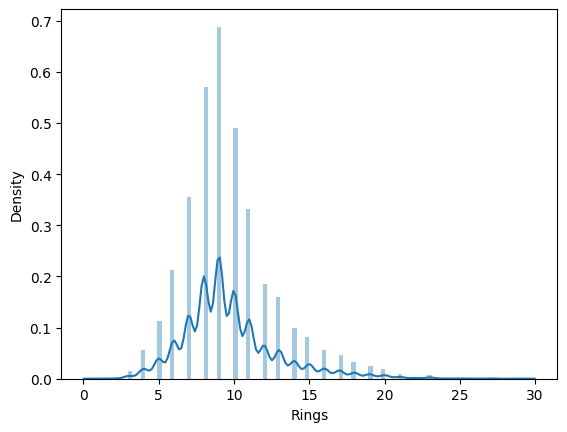

In [3]:
import seaborn as sns

sns.distplot(train_df.Rings, bins=100)


In [29]:
from scipy.stats import skew
import numpy as np

numerical_cols_train = train_df.select_dtypes(include=['int64', 'float64']).columns

# Fix skewness of SalePrice
train_df.Rings = np.log1p(train_df.Rings)

skewed_features = train_df[numerical_cols_train].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation

for i in skew_index:
    if i != 'Rings' and i != 'id':
        train_df[i] = np.log1p(train_df[i])
        test_df[i] = np.log1p(test_df[i])

C:\Users\Noud\AppData\Local\Temp\ipykernel_14424\2953002765.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Rings, bins=100)


<Axes: xlabel='Rings', ylabel='Density'>

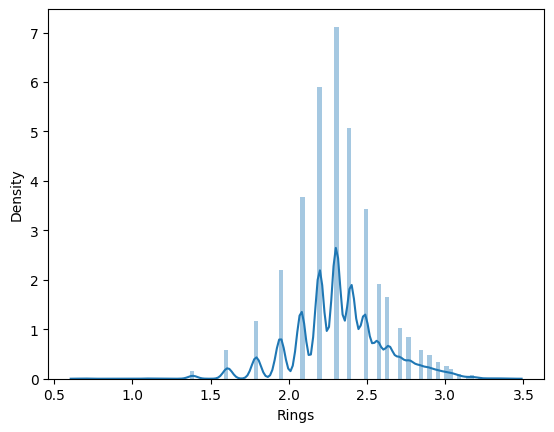

In [30]:
sns.distplot(train_df.Rings, bins=100)


In [31]:
# Get categorical columns from train set
categorical_cols = train_df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_df[categorical_cols] = ordinal_encoder.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = ordinal_encoder.transform(test_df[categorical_cols])

In [32]:
# Correlation matrix for train_set
corr_matrix = train_df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

# Create list of variables with correlation greater than 0.5 with SalePrice
corr_vars = [k for k in corr_matrix.index if corr_matrix['Rings'][k] > 0.4 or corr_matrix['Rings'][k] < -0.4]
# Remove SalePrice from corr_vars
corr_vars.remove('Rings')
corr_vars

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight']

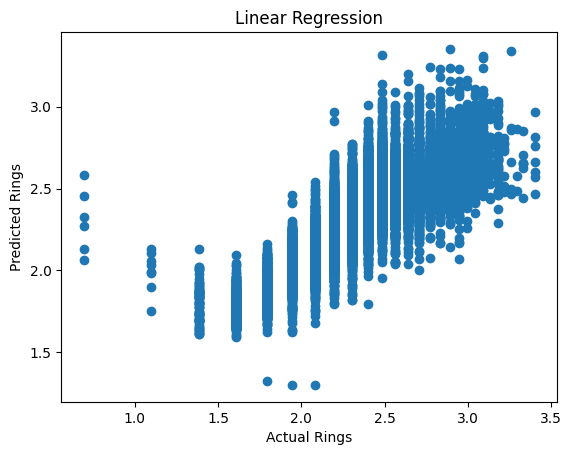

Multi linear regression: 
R2-score: 0.6527105593315947
MAE: 0.12481974852291713
RMSE: 0.16967893125549693


array([ 9.93902935,  8.76427845, 10.84760981, ...,  9.5027619 ,
       13.09689354, 11.9527019 ])

In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Predict Rings using all variables with correlation greater than 0.5 or less than -0.5 with Rings
X = train_df[corr_vars]
# Drop Rings from X
y = train_df['Rings']


X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.2, random_state=42)

X_train,y_train = X, y

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predictions_linear_regression = linear_regression.predict(X_val)

# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_linear_regression)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression')
plt.show()

print("Multi linear regression: ")
print("R2-score:", r2_score(y_val, predictions_linear_regression))
print("MAE:", mean_absolute_error(y_val, predictions_linear_regression))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_linear_regression)))

# Create list of predictions without the fixed skewness
predictions_linear_regression_no_skewness = np.exp(predictions_linear_regression)
predictions_linear_regression_no_skewness

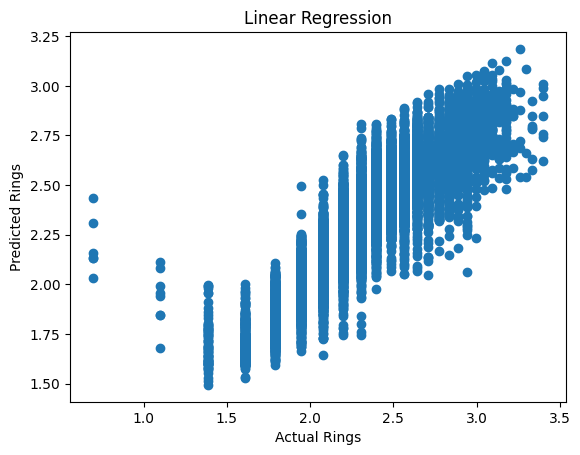

Catboost Regression: 
R2-score: 0.754180628349535
MAE: 0.10451450249088222
RMSE: 0.1427546234367011
RMSLE:  0.13003526248751462


In [43]:
from catboost import CatBoostRegressor

# train is the dataframe the train_set without the SalePrice column
X = train_df[corr_vars]
# target_log is the SalePrice column
y = train_df['Rings']

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train,y_train = X, y

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                    eval_set = (X_val,y_val),
                    verbose = 0)
predictions_cat = cat_model.predict(X_val)

# Show graph of predicted values vs actual values
plt.scatter(y_val, predictions_cat)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression')
plt.show()

print("Catboost Regression: ")
print("R2-score:", r2_score(y_val, predictions_cat))
print("MAE:", mean_absolute_error(y_val, predictions_cat))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
print("RMSE:", sqrt(mean_squared_error(y_val, predictions_cat)))

# Create list of predictions without the fixed skewness
predictions_cat_no_skewness = np.exp(predictions_cat)
y_val_no_skewness = np.exp(y_val)

rmsle = calculate_rmsle(y_val_no_skewness, predictions_cat_no_skewness)

print("RMSLE: ", rmsle)

In [35]:
import numpy as np

def calculate_rmsle(y_true, y_pred):
    """
    Calculate the Root Mean Squared Logarithmic Error (RMSLE) between two lists of actual and predicted values.
    
    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    
    Returns:
    - rmsle: float, the calculated RMSLE
    """
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the logarithms of y_true + 1 and y_pred + 1
    log_true = np.log(y_true + 1)
    log_pred = np.log(y_pred + 1)
    
    # Calculate the squared differences
    squared_differences = np.square(log_true - log_pred)
    
    # Compute RMSLE
    rmsle = np.sqrt(np.mean(squared_differences))
    return rmsle

rmsle = calculate_rmsle(y_val, predictions_cat)


0.04324688067446598

In [ ]:
# Create submission

test_df_predict = test_df[corr_vars]

test_predictions = cat_model.predict(test_df_predict)

# Revert log transformation for "Rings" variable
test_predictions = [np.expm1(prediction) for prediction in test_predictions]


test_predictions_rounded = np.round(test_predictions).astype(int)

list_of_ids = [id for id in test_df['id']]

list_of_predictions = [int(prediction) for prediction in test_predictions_rounded]

list_of_predictions


In [40]:
import csv

# Writing data to CSV file
with open('output.csv', 'w', newline='') as csvfile:
    fieldnames = ['id', 'Rings']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for id, rings in zip(list_of_ids, list_of_predictions):
        writer.writerow({'id': id, 'Rings': rings})

print("CSV file 'output.csv' has been created successfully.")

CSV file 'output.csv' has been created successfully.
